In [1]:
import os
import warnings
import pandas as pd
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
paths = os.listdir(path='F:\\')
bb_path = list(filter(lambda file: file.endswith('BB.csv'), paths))[0]
print(bb_path)

SVO-AER_2018-01-01--2019-12-31BB.csv


Файл тарифов:

In [3]:
dates = ["FLTDAT", "DAIS", "USE_DAT"]
dtypes = {'TARIF_SALE': 'object', 'SALE_CURR': 'object', 'FLTNUM': 'int32'}
bb = pd.read_csv('F:\\' + bb_path, delimiter=';', dtype=dtypes, parse_dates=dates)
bb = bb.dropna(how='any')
bb['TARIF_SALE'] = bb['TARIF_SALE'].astype(float)
bb['FLTTIME'] = pd.to_timedelta(bb['FLTTIME'])
bb[['CPTK', 'TDNR', 'TARIF_RUB', 'TARIF_SALE', 'AIRL', 'COUN', 'KOL_CPN']] = bb[['CPTK', 'TDNR', 'TARIF_RUB', 'TARIF_SALE', 'AIRL', 'COUN', 'KOL_CPN']].astype('float32')
bb.head()

,AIRL,CPTK,TDNR,COUN,FLTDAT,FLTTIME,DAIS,MCAR,FLTNUM,ORAP,DSAP,BCLS,FBTD,KOL_CPN,TARIF_RUB,SALE_CURR,TARIF_SALE,USE_STAT,USE_DAT
0,555.0,5.190193e+09,5.190193e+09,2.0,2018-01-21,0 days 13:35:00,2018-01-20,SU,1124,SVO,AER,E,EVOR,1.0,2740.229980,EUR,39.490002,USED,2018-01-21
1,555.0,5.963380e+09,5.963380e+09,4.0,2018-01-10,0 days 09:10:00,2017-11-13,SU,1122,SVO,AER,L,LVU,1.0,4744.339844,EUR,68.779999,USED,2018-01-10
2,555.0,2.140311e+09,2.140311e+09,1.0,2018-01-11,0 days 09:10:00,2017-09-30,SU,1122,SVO,AER,N,NVUR,1.0,1530.000000,RUB,1530.000000,EXCH,2018-01-04
3,555.0,2.140303e+09,2.140303e+09,1.0,2018-01-26,0 days 17:35:00,2017-09-30,SU,1140,SVO,AER,N,NVUR,1.0,1529.880005,RUB,1529.880005,USED,2018-01-26
4,555.0,2.139698e+09,2.139698e+09,1.0,2018-01-06,0 days 09:10:00,2017-09-12,SU,1122,SVO,AER,N,NCLRCH25,1.0,1897.109985,RUB,1897.109985,USED,2018-01-06


Уникальных рейсов:

In [4]:
FLTNUM_unique = bb['FLTNUM'].unique()
print(len(FLTNUM_unique), FLTNUM_unique, sep='\n')

33
[1124 1122 1140 1134 1138 1130 1126 1120 1128    0 1132 1740 1792 1790
 1780 1796 2980 1784 1786 1798 1782 1788 6179 1136 6181 1148 6195 1116
 1118 6185 1338 1732 1152]


Есть рейс с нулевым значением.

### Средние цены классов каждого номера рейса на каждую дату вылета

In [5]:
mean_prices = bb.groupby(by=['FLTNUM', 'FLTDAT', 'BCLS'])['TARIF_RUB'].mean().reset_index()
mean_prices.to_csv('F:\\mean_prices.csv')
mean_prices.head()

,FLTNUM,FLTDAT,BCLS,TARIF_RUB
0,0,2018-01-04,J,15139.09082
1,0,2018-01-09,J,17385.00000
2,0,2018-01-11,J,16470.00000
3,0,2018-01-13,J,14640.00000
4,0,2018-01-15,J,17385.00000


На каждый рейс на каждую дату вылета присутсивуют не все классы билетов. Например, для рейса 1152 на 2019-12-31 из 26 классов присутствуют только 10 видов:

In [6]:
mean_prices[(mean_prices['FLTNUM'] == 1152) & (mean_prices['FLTDAT'] == '2019-12-31')]

,FLTNUM,FLTDAT,BCLS,TARIF_RUB
44417,1152,2019-12-31,D,37366.667969
44418,1152,2019-12-31,E,2124.886230
44419,1152,2019-12-31,H,10666.672852
44420,1152,2019-12-31,L,8252.816406
44421,1152,2019-12-31,M,2500.000000
44422,1152,2019-12-31,N,1390.739990
44423,1152,2019-12-31,Q,6506.707031
44424,1152,2019-12-31,T,2944.169922
44425,1152,2019-12-31,U,19950.000000
44426,1152,2019-12-31,X,0.000000


Также бывают классы на конкретный рейс и дату вылета с ценой в 0.0 рублей. Например:

In [7]:
bb[(bb['FLTNUM'] == 1152) & (bb['FLTDAT'] == '2019-12-31') & (bb['BCLS'] == 'X')]

,AIRL,CPTK,TDNR,COUN,FLTDAT,FLTTIME,DAIS,MCAR,FLTNUM,ORAP,DSAP,BCLS,FBTD,KOL_CPN,TARIF_RUB,SALE_CURR,TARIF_SALE,USE_STAT,USE_DAT
430501,555.0,2.119327e+09,2.119327e+09,1.0,2019-12-31,0 days 07:20:00,2019-10-15,SU,1152,SVO,AER,X,XWR1R1,1.0,0.0,RUB,0.0,USED,2019-12-31
434189,555.0,2.119300e+09,2.119300e+09,1.0,2019-12-31,0 days 07:20:00,2019-10-14,SU,1152,SVO,AER,X,XWR1R1,1.0,0.0,RUB,0.0,USED,2019-12-31


### Средние цены по всем классам

In [9]:
class_mean_price = bb.groupby(by=['BCLS'])['TARIF_RUB'].mean().reset_index()
class_mean_price.head()

,BCLS,TARIF_RUB
0,B,17816.359375
1,C,33366.519531
2,D,30820.113281
3,E,3274.031494
4,G,3502.141357


Из 26 классов присутствуют 21.

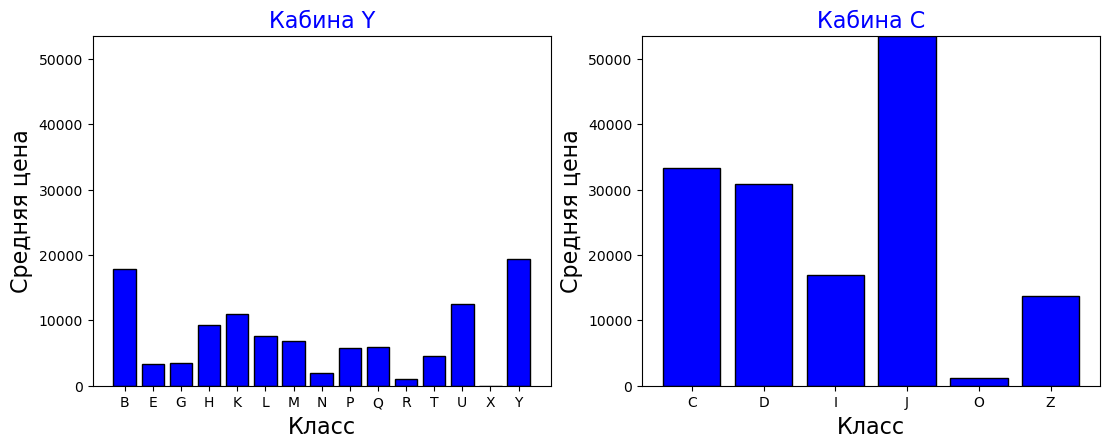

In [10]:
plt.figure(figsize=[13, 10])
mean_price = class_mean_price['TARIF_RUB']
plt.subplot(2, 2, 1)
class_y = ['B', 'E', 'G', 'H', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'T', 'U', 'X', 'Y']
class_y_values = mean_price[mean_price.index.isin([0, 3, 4, 5, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19])]
plt.bar(class_y, class_y_values, color='blue', edgecolor='black')
plt.ylabel('Средняя цена', fontsize=16)
plt.ylim(min(mean_price), max(mean_price))
plt.xlabel('Класс', fontsize=16)
plt.title('Кабина Y', color='b', fontsize=16)
plt.subplot(2, 2, 2)
class_c = ['C', 'D', 'I', 'J', 'O', 'Z']
class_c_values = mean_price[mean_price.index.isin([1, 2, 6, 7, 12, 20])]
plt.bar(class_c, class_c_values, color='blue', edgecolor='black')
plt.ylabel('Средняя цена', fontsize=16)
plt.ylim(min(mean_price), max(mean_price))
plt.xlabel('Класс', fontsize=16)
plt.title('Кабина C', color='b', fontsize=16)
plt.show()

Классы кабины W не представлены в датасете.

### Средние цены по датам вылета

In [11]:
dat_mean_price = bb.groupby(by=['FLTDAT'])['TARIF_RUB'].mean().reset_index()
dat_mean_price.head()

,FLTDAT,TARIF_RUB
0,2018-01-01,9127.141602
1,2018-01-02,9848.156250
2,2018-01-03,9621.391602
3,2018-01-04,5395.438477
4,2018-01-05,4050.655029


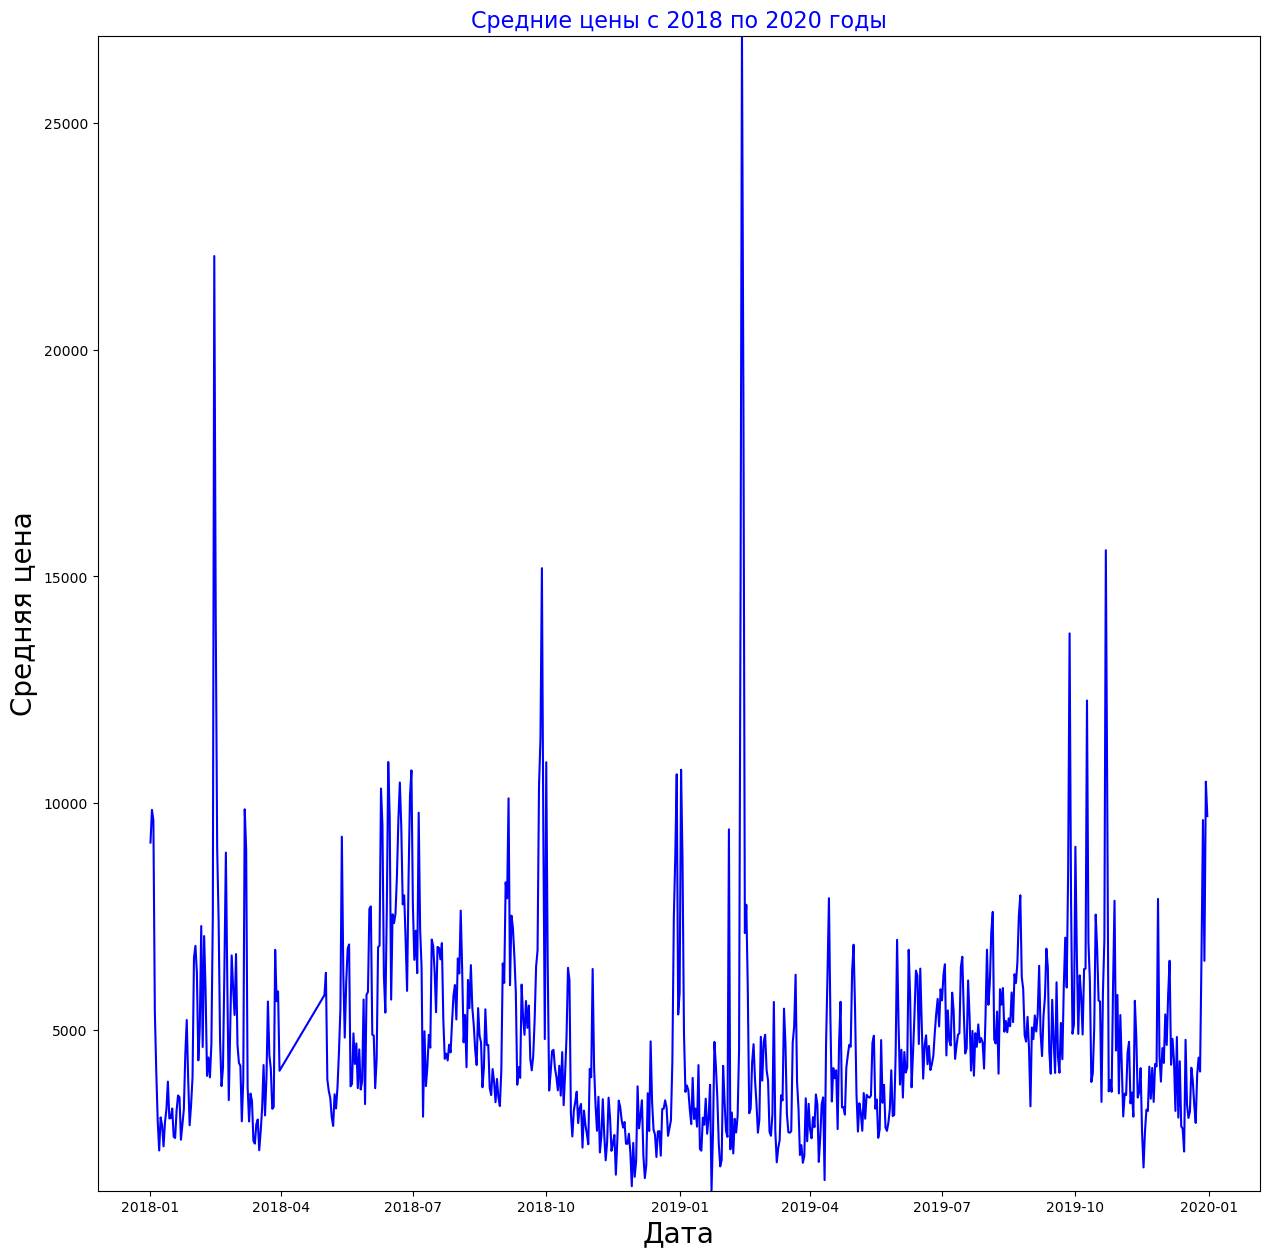

In [12]:
plt.figure(figsize=[15, 15])
plt.plot(dat_mean_price['FLTDAT'], dat_mean_price['TARIF_RUB'], color='blue')
plt.ylabel('Средняя цена', fontsize=20)
plt.ylim(min(dat_mean_price['TARIF_RUB']), max(dat_mean_price['TARIF_RUB']))
plt.xlabel('Дата', fontsize=20)
plt.title('Средние цены с 2018 по 2020 годы', color='b', fontsize=16)
plt.show()

Выброс по ценам в феврале/марте 2019 года.

### Средние цены по номерам рейсов

In [13]:
flt_mean_price = bb.groupby(by=['FLTNUM'])['TARIF_RUB'].mean().reset_index()
flt_mean_price.head()

,FLTNUM,TARIF_RUB
0,0,14417.349609
1,1116,5917.766113
2,1118,6827.220703
3,1120,4172.818848
4,1122,6148.693848


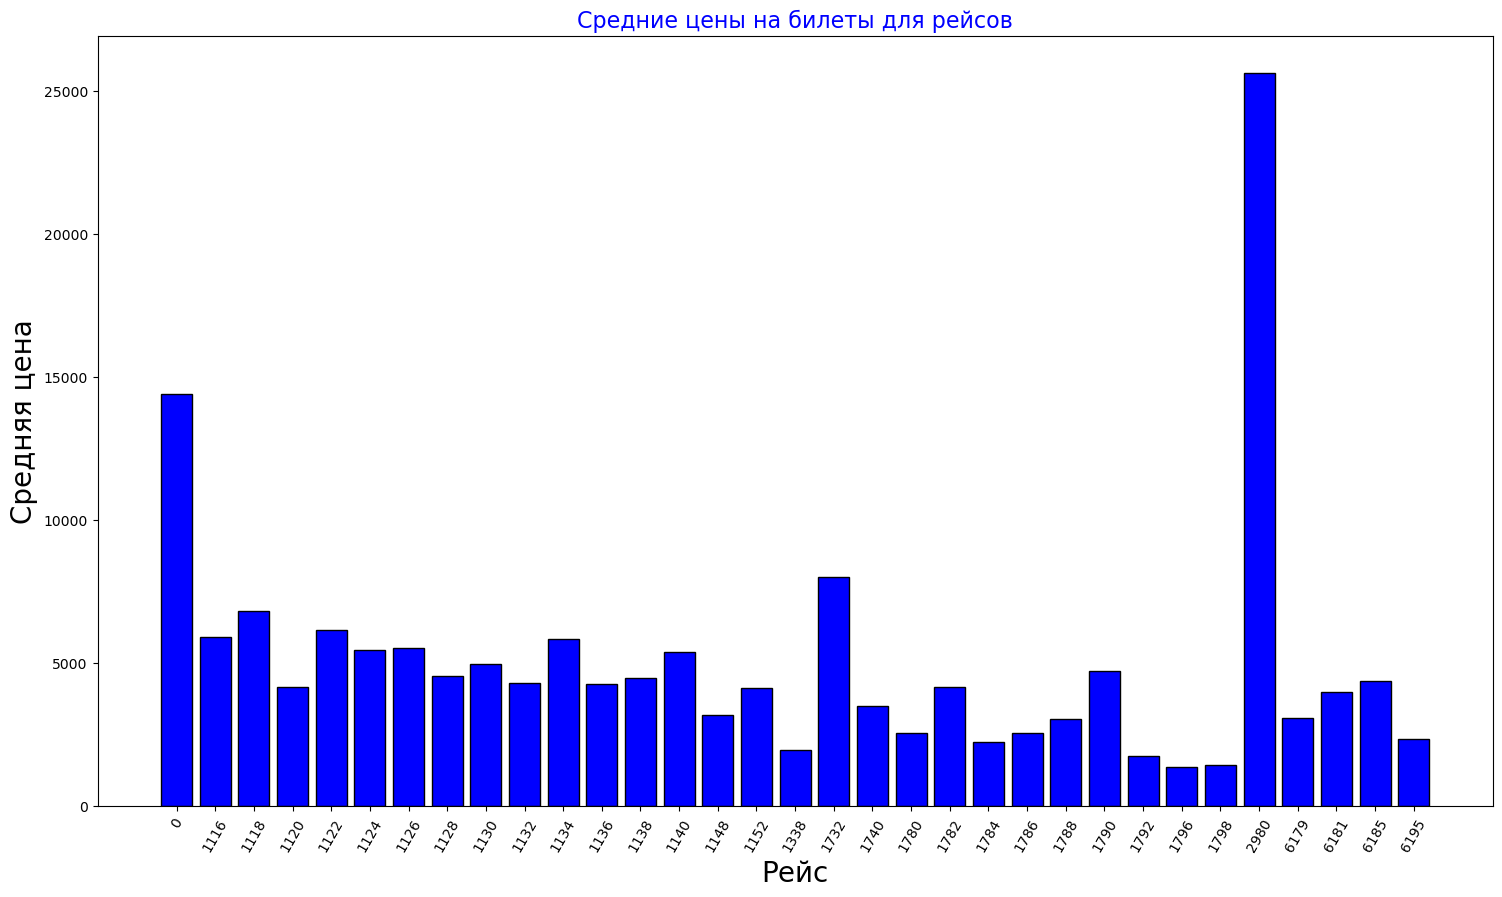

In [14]:
plt.figure(figsize=[18, 10])
FLTNUM = flt_mean_price['FLTNUM'].apply(str)
plt.bar(FLTNUM, flt_mean_price['TARIF_RUB'], color='blue', edgecolor='black')
plt.ylabel('Средняя цена', fontsize=20)
plt.xlabel('Рейс', fontsize=20)
plt.xticks(rotation=60)
plt.title('Средние цены на билеты для рейсов', color='b', fontsize=16)
plt.show()

Рейс с номером 2980 имеет выброс по средней цене.

In [16]:
bb[(bb['FLTNUM'] == 2980)]

,AIRL,CPTK,TDNR,COUN,FLTDAT,FLTTIME,DAIS,MCAR,FLTNUM,ORAP,DSAP,BCLS,FBTD,KOL_CPN,TARIF_RUB,SALE_CURR,TARIF_SALE,USE_STAT,USE_DAT
106398,555.0,7.120499e+09,7.120499e+09,2.0,2018-07-06,0 days 17:50:00,2018-07-05,SU,2980,SVO,AER,D,DCO,1.0,33841.339844,USD,535.23999,USED,2018-07-06
106399,555.0,7.120499e+09,7.120499e+09,1.0,2018-07-06,0 days 17:50:00,2018-07-05,SU,2980,SVO,AER,C,CCOR,1.0,42994.160156,USD,680.00000,USED,2018-07-06
106407,555.0,5.798116e+09,5.798116e+09,1.0,2018-07-06,0 days 00:00:00,2018-07-06,SU,2980,SVO,AER,Q,QVOR,1.0,6352.990234,CAD,132.00000,USED,2018-07-06
106416,555.0,7.120499e+09,7.120499e+09,1.0,2018-07-06,0 days 17:50:00,2018-07-05,SU,2980,SVO,AER,C,CCOR,1.0,42994.160156,USD,680.00000,USED,2018-07-06
106417,555.0,7.120502e+09,7.120502e+09,1.0,2018-07-06,0 days 17:50:00,2018-07-05,SU,2980,SVO,AER,D,DCOR/CH25,1.0,20991.259766,USD,332.00000,USED,2018-07-06
106418,555.0,7.120502e+09,7.120502e+09,1.0,2018-07-06,0 days 17:50:00,2018-07-05,SU,2980,SVO,AER,D,DCOR,1.0,28009.429688,USD,443.00000,USED,2018-07-06
106493,555.0,2.542889e+09,2.542889e+09,1.0,2018-07-06,0 days 17:50:00,2018-07-06,SU,2980,SVO,AER,L,LVOR,1.0,8278.139648,CAD,172.00000,USED,2018-07-06
106568,555.0,7.120497e+09,7.120497e+09,1.0,2018-07-06,0 days 17:50:00,2018-07-05,SU,2980,SVO,AER,C,CCOR,1.0,42994.160156,USD,680.00000,USED,2018-07-06
107061,555.0,7.120497e+09,7.120497e+09,1.0,2018-07-06,0 days 17:50:00,2018-07-05,SU,2980,SVO,AER,C,CCOR,1.0,42994.160156,USD,680.00000,USED,2018-07-06
124224,555.0,2.023644e+09,2.023644e+09,1.0,2018-07-06,0 days 00:00:00,2018-07-06,SU,2980,SVO,AER,Q,QVOR,1.0,6372.490234,SEK,882.00000,USED,2018-07-06
